# ガウス過程回帰のデモプログラム

ガウス過程回帰のデモプログラムです。  
ガウス過程回帰の中身に関してはこちら↓で解説しています。  
https://yuyumoyuyu.com/2021/03/07/gaussianprocessregression/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel, Matern, DotProduct

### なんとなくガウス過程回帰を理解するためのプログラム

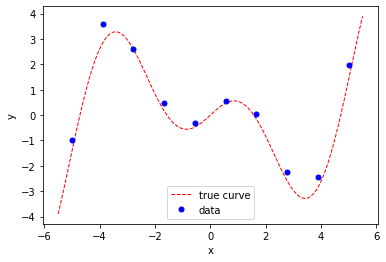

In [2]:
# y = x*cos(x)をベースにデータ生成
np.random.seed(seed=1)
x_data = np.linspace(-5.,5.,10)
y_data = x_data * np.cos(x_data) + np.random.rand(10)

x_true = np.linspace(-5.5,5.5,100)
y_true = x_true * np.cos(x_true)

# 可視化
plt.plot(x_true, y_true, 'r--', lw=1., label='true curve')
plt.plot(x_data, y_data, 'o', c='b', ms=5, label='data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

In [3]:
def plot_gpr(x_train, y_train, x_test, mean_pred, std_pred):
    plt.plot(x_test, mean_pred, "b--", label="predicted mean")
    plt.fill_between(x_test, mean_pred + std_pred, mean_pred - std_pred, 
                     color="C0", alpha=.3,label= "1-sigma confidence")
    plt.plot(x_train, y_train, "o",c='b')

Optimized kernel: 
   1.1**2 * RBF(length_scale=0.92) + WhiteKernel(noise_level=1e-05)


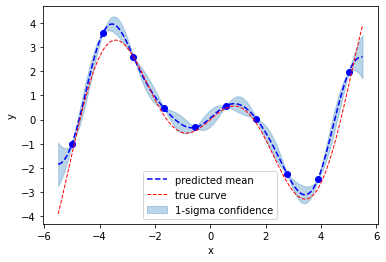

In [4]:
# GPRの学習
gpr = GaussianProcessRegressor(
    ConstantKernel() * RBF() + WhiteKernel(), 
    alpha=1e-10,
    normalize_y=True)

gpr.fit(x_data.reshape(-1,1), y_data)

print('Optimized kernel: \n  ', gpr.kernel_)

mean_pred, std_pred= gpr.predict(x_true.reshape(-1,1), return_std=True)

plot_gpr(x_data, y_data, x_true, mean_pred, std_pred)
plt.plot(x_true, y_true, 'r--', lw=1., label='true curve')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()


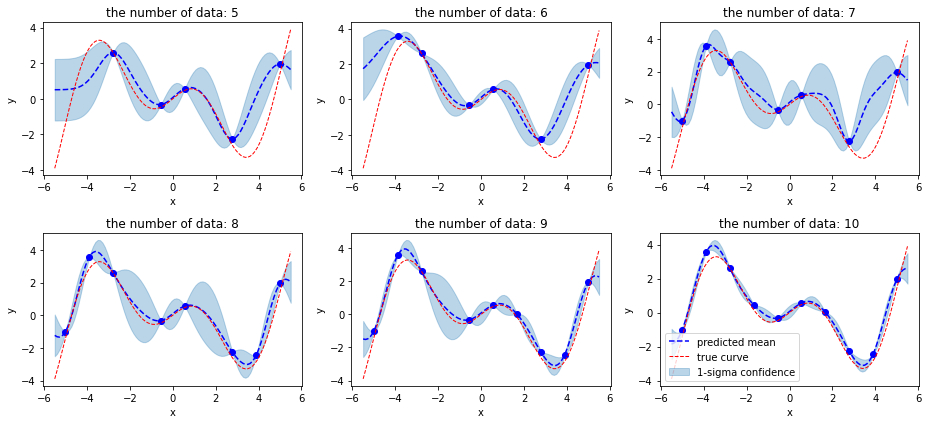

In [5]:
# データ数を変えてみる
np.random.seed(seed=5)
data_shuffle = np.random.permutation(np.stack((x_data, y_data)).T)

fig, ax = plt.subplots(2, 3, figsize=(13,6))
axes = ax.ravel()

for i in range(6):
    data_ = data_shuffle[:i+5]
    x_data_ = data_.T[0].reshape(-1,1)
    y_data_ = data_.T[1]
    
    gpr_ = GaussianProcessRegressor(
        ConstantKernel() * RBF() + WhiteKernel(), 
        alpha=1e-10,
        normalize_y=True)

    gpr_.fit(x_data_, y_data_)

    mean_pred, std_pred= gpr_.predict(x_true.reshape(-1,1), return_std=True)

    axes[i].plot(x_true, mean_pred, "b--", label="predicted mean")
    axes[i].fill_between(x_true, mean_pred + std_pred, mean_pred - std_pred, 
                     color="C0", alpha=.3,label= "1-sigma confidence")
    axes[i].plot(x_data_, y_data_, "o",c='b')
    axes[i].plot(x_true, y_true, 'r--', lw=1., label='true curve')
    
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title('the number of data: ' + str(i+5))
    if i ==5: axes[i].legend(loc='best')

fig.tight_layout()

データ数が増えるにつれ，予測の平均値は真の曲線に近づき，  
±1σのエリアも狭くなっている。

### 実務データでの使い方

##### データの整形

In [6]:
# ボストンの住宅価格データセットを用いる
from sklearn.datasets import load_boston

boston = load_boston()

# 入力変数
df_boston_X = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
# 目的変数（住宅価格）
df_boston_y = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [8]:
# データのtrain/test分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_boston_X, boston.target, random_state=1, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [9]:
# 入力データの正規化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケーラを保存したいときは↓を有効化
# joblib.dump(scaler, "scaler_path.pkl")

In [10]:
print("pre-transformed shape: {}".format(X_train.shape))
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

pre-transformed shape: (404, 13)
transformed shape: (404, 13)
per-feature minimum before scaling:
 CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
dtype: float64
per-feature maximum before scaling:
 CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64
per-feature minimum after scaling:
 [-0.40404675 -0.49559343 -1.55228176 -0.29329423 -1.43919784 -3.93359952
 -2.27972757 -1.27291627 -0.97702399 -1.28098535 -2.69460131 -3.90288077
 -1.53292984]
per-feature maximum after scaling:
 [9.33496077 3.80373548 2.43606262 3.40954542 2.7235458  3.64802244
 1

##### 使用するカーネル  
$$
    k(\boldsymbol{x},\boldsymbol{x}')=\theta_{0}\exp(-\frac{\theta_{1}}{2}||\boldsymbol{x}-\boldsymbol{x}'||^{2})+\theta_{2}+\theta_{3}\boldsymbol{x}^{T}\boldsymbol{x}'
$$

In [11]:
t1 = time.time()

gpr_boston = GaussianProcessRegressor(ConstantKernel() * RBF() + WhiteKernel() + ConstantKernel() * DotProduct())
gpr_boston.fit(X_train_scaled, y_train)

print("Elapsed time: {}sec".format(time.time()-t1))
print('Optimized kernel: \n  ', gpr_boston.kernel_)

print("\nScore")
print("  Training set score: {:.3f}".format(gpr_boston.score(X_train_scaled, y_train))) 
print("  Test set score: {:.3f}".format(gpr_boston.score(X_test_scaled, y_test)))

Elapsed time: 0.9303586483001709sec
Optimized kernel: 
   7.82**2 * RBF(length_scale=2.17) + WhiteKernel(noise_level=4.65) + 1.9**2 * DotProduct(sigma_0=14.3)

Score
  Training set score: 0.965
  Test set score: 0.928


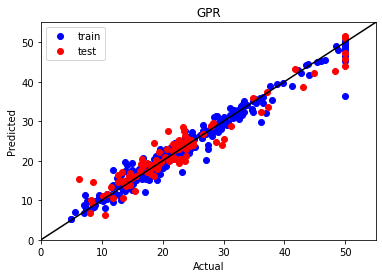

In [12]:
# 学習結果を可視化
y_calculated_train = gpr_boston.predict(X_train_scaled)
y_predicted_test = gpr_boston.predict(X_test_scaled)

plt.plot(y_train, y_calculated_train, 'o', color='b', label='train')
plt.plot(y_test, y_predicted_test, 'o', color='r', label='test')

plt.plot([0, 60], [0, 60], '-', color='k')

plt.xlim([0, 55])
plt.ylim([0, 55])

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('GPR')

plt.legend(loc='best')

plt.show()

複数のカーネル関数から最適化したい場合はこちらのサイトが参考になります  
https://datachemeng.com/kernel_design_in_gpr/